In [19]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, replace_values_by_condition
from ipynb.fs.full.plots import heatmap, likert

In [20]:
# get formatted and ready to use dataframe
df = get_df()

In [21]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [22]:
df[['Q1_ML_Life_Cycle_Importance_Problem_Understanding', 'Q1_ML_Life_Cycle_Importance_Data_Collection', 
'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', 'Q1_ML_Life_Cycle_Importance_Model_Creation',
'Q1_ML_Life_Cycle_Importance_Model_Evaluation', 'Q1_ML_Life_Cycle_Importance_Model_Deployment',
'Q1_ML_Life_Cycle_Importance_Model_Monitoring']].head()

,Q1_ML_Life_Cycle_Importance_Problem_Understanding,Q1_ML_Life_Cycle_Importance_Data_Collection,Q1_ML_Life_Cycle_Importance_Data_Pre-Processing,Q1_ML_Life_Cycle_Importance_Model_Creation,Q1_ML_Life_Cycle_Importance_Model_Evaluation,Q1_ML_Life_Cycle_Importance_Model_Deployment,Q1_ML_Life_Cycle_Importance_Model_Monitoring
2,Extremely Relevant,High Relevance,High Relevance,High Relevance,High Relevance,High Relevance,Neutral
3,High Relevance,High Relevance,High Relevance,Extremely Relevant,Extremely Relevant,Extremely Relevant,High Relevance
4,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant
5,Extremely Relevant,Neutral,Low Relevance,Neutral,High Relevance,Extremely Relevant,Neutral
6,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant


In [23]:
# two unexpected values appear = 0 and -77
# replace them to "I don't know" value

# replacing 0
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Problem_Understanding', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Collection', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Creation', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Evaluation', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Deployment', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Monitoring', "0", "I don't know", "eq")

# replacing -77
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Problem_Understanding', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Collection', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Creation', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Evaluation', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Deployment', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Monitoring', "-77", "I don't know", "eq")

In [24]:
columns = {
    'Q1_ML_Life_Cycle_Importance_Problem_Understanding': 'Problem Understanding',
    'Q1_ML_Life_Cycle_Importance_Data_Collection': 'Data Collection',
    'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing': 'Data Pre-Processing',
    'Q1_ML_Life_Cycle_Importance_Model_Creation': 'Model Creation',
    'Q1_ML_Life_Cycle_Importance_Model_Evaluation': 'Model Evaluation',
    'Q1_ML_Life_Cycle_Importance_Model_Deployment': 'Model Deployment',
    'Q1_ML_Life_Cycle_Importance_Model_Monitoring': 'Model Monitoring'
}

values = ["Not Relevant at All", "Low Relevance", "Neutral", "High Relevance", "Extremely Relevant", "I don't know"]


# it will store the life cycles
life_cycles = []
# it will store the difficulties
difficulties = []
# it will store the total answers of those who answered 'Problem Understanding' and 
# said that is 'Not Relevant at All', 'Low Relevance'... then, 'Data Collection' with 'Not Relevant at All', 'Low Relevance'...
answers = []

# let's compute for each life cycle and difficulty, the total answers
for column in columns:
    for value in values:
        
        life_cycles.append(columns[column])
        difficulties.append(value)
        answers.append(df[column].value_counts().get(value, 0))

In [25]:
# create a custom dataframe to handle only the columns that we want
q1_df = pd.DataFrame()
q1_df['Life Cycle'] = life_cycles
q1_df['Relevance'] = difficulties
q1_df['Answers'] = answers

In [26]:
q1_df

,Life Cycle,Relevance,Answers
0,Problem Understanding,Not Relevant at All,3
1,Problem Understanding,Low Relevance,0
2,Problem Understanding,Neutral,6
3,Problem Understanding,High Relevance,30
4,Problem Understanding,Extremely Relevant,145
5,Problem Understanding,I don't know,92
6,Data Collection,Not Relevant at All,1
7,Data Collection,Low Relevance,3
8,Data Collection,Neutral,16
9,Data Collection,High Relevance,67


In [27]:
# to use a custom order of columns on heatmap 
# you need to put the index of the columns displayed on this cell in the order you want
# pivot_df = q1_df.pivot('Life Cycle', 'Relevance', 'Answers')
# print(pivot_df.columns)

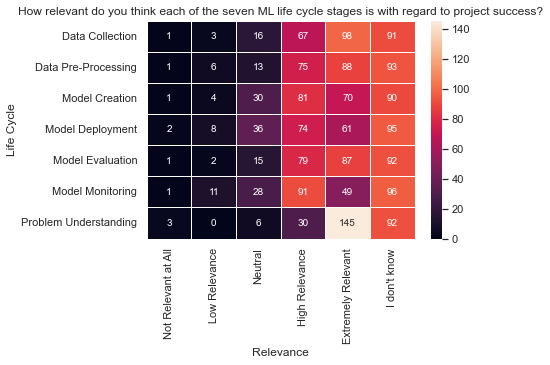

In [28]:
heatmap(q1_df, 'Life Cycle', 'Relevance', 'Answers', order=[5, 3, 4, 1, 0, 2], title='How relevant do you think each of the seven ML life cycle stages is with regard to project success?')

In [29]:
def likert_formatted_df(column, formatted_column, values):
    # for this column, we will plot a likert plot
    
    # it will store the total difficulties for this column, each answer = one row
    difficulties = []

    # let's compute for each life cycle and difficulty, the total answers
    for value in values:
        total_answers_difficulty = df[column].value_counts().get(value, 0)
        for _ in range(total_answers_difficulty):
            difficulties.append(value)
    
    column_likert_df = pd.DataFrame()
    column_likert_df['Difficulty on ' + formatted_column] = difficulties
    
    likert(column_likert_df, values, use_percentage=True, bar_label=True)

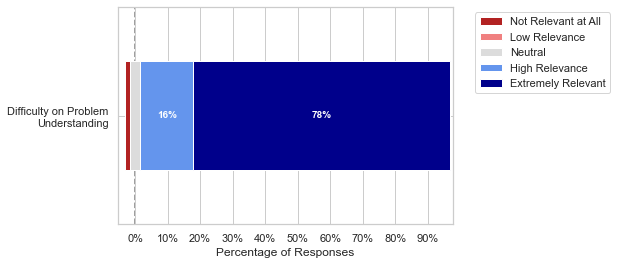

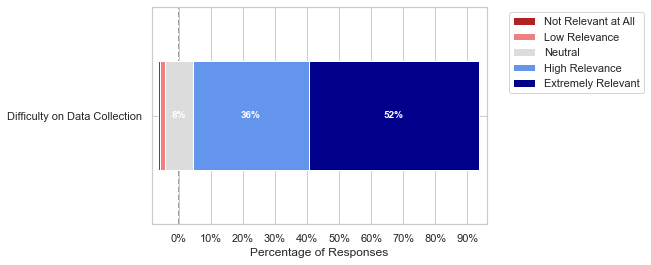

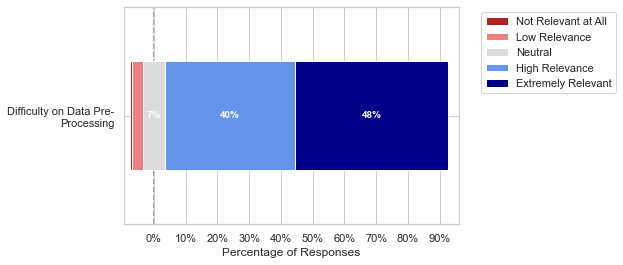

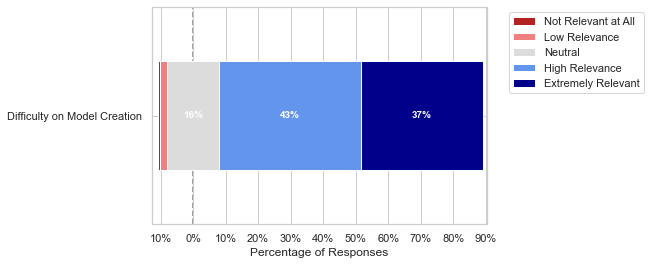

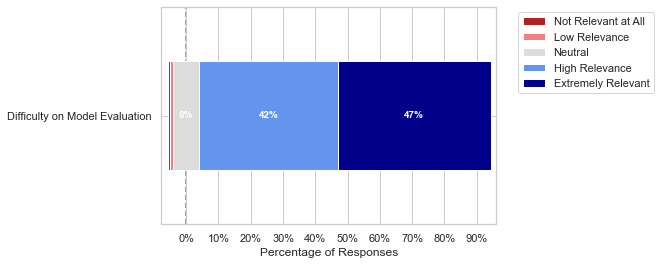

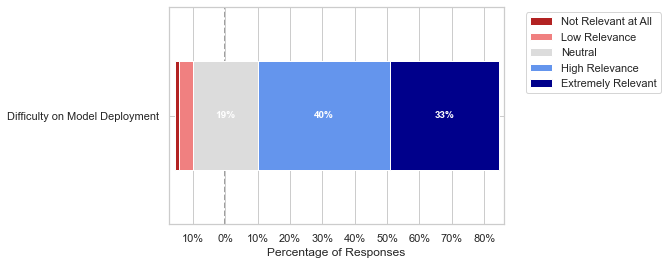

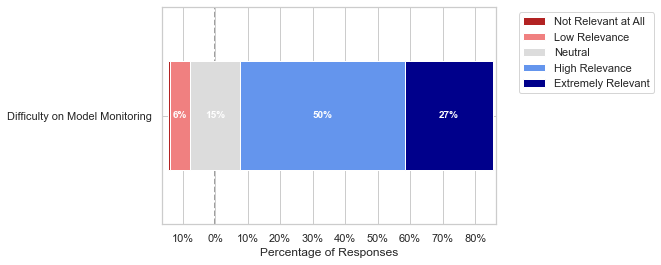

In [31]:
columns = {
        'Q1_ML_Life_Cycle_Importance_Problem_Understanding': 'Problem Understanding',
        'Q1_ML_Life_Cycle_Importance_Data_Collection': 'Data Collection',
        'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing': 'Data Pre-Processing',
        'Q1_ML_Life_Cycle_Importance_Model_Creation': 'Model Creation',
        'Q1_ML_Life_Cycle_Importance_Model_Evaluation': 'Model Evaluation',
        'Q1_ML_Life_Cycle_Importance_Model_Deployment': 'Model Deployment',
        'Q1_ML_Life_Cycle_Importance_Model_Monitoring': 'Model Monitoring'
    }
values = ["Not Relevant at All", "Low Relevance", "Neutral", "High Relevance", "Extremely Relevant"]
for column in columns:
    likert_formatted_df(column, columns[column], values)